In [41]:
import pandas as pd
import json
import gzip
from operator import itemgetter
import matplotlib.pyplot as plt

In [43]:
with gzip.open('data/abcd_v1.1.json.gz') as f:
    data = json.load(f)

In [46]:
df = pd.DataFrame(data['train'])
df = df[['convo_id', 'scenario', 'original']]

In [47]:
df_utterances = df.explode('original')
df_utterances['speaker'] = df_utterances['original'].apply(itemgetter(0))
df_utterances['utterance'] = df_utterances['original'].apply(itemgetter(1))
df_utterances['utterance_length'] = df_utterances['utterance'].apply(len)


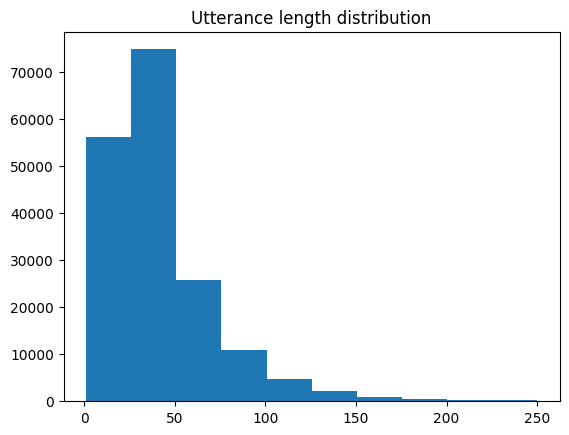

In [58]:
plt.hist(df_utterances['utterance_length'])
plt.title("Utterance length distribution")
plt.show()

## Conversation level stats

In [51]:
df['flow'] = df['scenario'].apply(itemgetter('flow'))
df['num_utterances'] = df['original'].apply(len)

In [52]:
df['flow'].value_counts()

storewide_query         872
product_defect          863
purchase_dispute        858
account_access          847
single_item_query       840
order_issue             831
troubleshoot_site       819
shipping_issue          814
subscription_inquiry    718
manage_account          572
Name: flow, dtype: int64

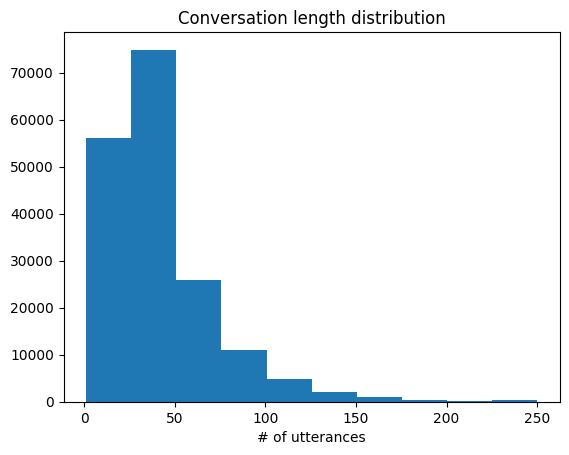

In [59]:
plt.hist(df_utterances['utterance_length'])
plt.title("Conversation length distribution")
plt.xlabel("# of utterances")
plt.show()